In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import os
import time
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\saile\AppData\Local\Temp\ipykernel_9204\1183870883.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Index 0: pelvis_tilt
# Index 1: pelvis_list
# Index 2: pelvis_rotation
# Index 3: pelvis_tx
# Index 4: pelvis_ty
# Index 5: pelvis_tz
# Index 6: hip_flexion_r
# Index 7: hip_adduction_r
# Index 8: hip_rotation_r
# Index 9: knee_angle_r
# Index 10: knee_angle_r_beta
# Index 11: ankle_angle_r
# Index 12: subtalar_angle_r
# Index 13: mtp_angle_r
# Index 14: hip_flexion_l
# Index 15: hip_adduction_l
# Index 16: hip_rotation_l
# Index 17: knee_angle_l
# Index 18: knee_angle_l_beta
# Index 19: ankle_angle_l
# Index 20: subtalar_angle_l
# Index 21: mtp_angle_l
# Index 22: lumbar_extension
# Index 23: lumbar_bending
# Index 24: lumbar_rotation
# Index 25: arm_flex_r
# Index 26: arm_add_r
# Index 27: arm_rot_r
# Index 28: elbow_flex_r
# Index 29: pro_sup_r
# Index 30: wrist_flex_r
# Index 31: wrist_dev_r
# Index 32: arm_flex_l
# Index 33: arm_add_l
# Index 34: arm_rot_l
# Index 35: elbow_flex_l
# Index 36: pro_sup_l
# Index 37: wrist_flex_l
# Index 38: wrist_dev_l
# Index 39: time
# Index 40: 1
# Index 41: IM EMG1
# Index 42: IM EMG2
# Index 43: IM EMG3
# Index 44: IM EMG4
# Index 45: IM EMG5
# Index 46: IM EMG6
# Index 47: IM EMG7
# Index 48: IM EMG8
# Index 49: ACCX1
# Index 50: ACCY1
# Index 51: ACCZ1
# Index 52: GYROX1
# Index 53: GYROY1
# Index 54: GYROZ1
# Index 55: ACCX2
# Index 56: ACCY2
# Index 57: ACCZ2
# Index 58: GYROX2
# Index 59: GYROY2
# Index 60: GYROZ2
# Index 61: ACCX3
# Index 62: ACCY3
# Index 63: ACCZ3
# Index 64: GYROX3
# Index 65: GYROY3
# Index 66: GYROZ3
# Index 67: ACCX4
# Index 68: ACCY4
# Index 69: ACCZ4
# Index 70: GYROX4
# Index 71: GYROY4
# Index 72: GYROZ4
# Index 73: ACCX5
# Index 74: ACCY5
# Index 75: ACCZ5
# Index 76: GYROX5
# Index 77: GYROY5
# Index 78: GYROZ5
# Index 79: ACCX6
# Index 80: ACCY6
# Index 81: ACCZ6
# Index 82: GYROX6
# Index 83: GYROY6
# Index 84: GYROZ6
# Index 85: ACCX7
# Index 86: ACCY7
# Index 87: ACCZ7
# Index 88: GYROX7
# Index 89: GYROY7
# Index 90: GYROZ7
# Index 91: ACCX8
# Index 92: ACCY8
# Index 93: ACCZ8
# Index 94: GYROX8
# Index 95: GYROY8
# Index 96: GYROZ8


In [3]:
import sys
sys.path.append('../kinematicsnet')
from models import Kinematics_lightweight

# Instantiate model
model = Kinematics_lightweight(3, 3)

model.to('cuda')
# Calculate the total size of parameters in bytes
total_size_bytes = sum(p.numel() * p.element_size() for p in model.parameters())
print(f'Total size in bytes: {total_size_bytes}')

# Convert total size in bytes to kilobytes
total_size_kb = total_size_bytes / 1024
print(f'Total size in kilobytes: {total_size_kb:.2f} KB')

# Calculate the total size of parameters in bytes
total_size_bytes = sum(p.numel() * p.element_size() for p in model.parameters())
print(f'Total size in bytes: {total_size_bytes}')

# Convert total size in bytes to kilobytes
total_size_kb = total_size_bytes / 1024
print(f'Total size in kilobytes: {total_size_kb:.2f} KB')

Total size in bytes: 131144
Total size in kilobytes: 128.07 KB
Total size in bytes: 131144
Total size in kilobytes: 128.07 KB


In [4]:
#Index 55: ACCX2
# Index 56: ACCY2
# Index 57: ACCZ2
# Index 58: GYROX2
# Index 59: GYROY2
# Index 60: GYROZ2

# Index 28: elbow_flex_r
sys.path.append('../utils')
from configs import config_general
from datasets import ImuJointPairDataset
config = config_general(
    data_folder_name="../../datacollection/vicon",
    dataset_root="../../datasets",
    dataset_name="two_subject",
    window_length=100,
    window_overlap=50,
    input_format="csv",
    num_patients=2,
    channels_imu=['ACCX2', 'ACCY2', 'ACCZ2', 'GYROX2', 'GYROY2', 'GYROZ2'],  # Column names for IMU data in CSV
    channels_joints=['elbow_flex_r'],  # Column name for joint data in CSV
    imu_transforms=[],
    joint_transforms=[]
)

c:\Users\saile\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [5]:
from datasharders import DataSharder
reshard_data = False
if reshard_data:
    data_sharder = DataSharder(config)
    data_sharder.load_data()

In [6]:
train_dataset = ImuJointPairDataset(config, split='train')
print(train_dataset.__getitem__(0)[0].shape, train_dataset.__getitem__(0)[1].shape)
test_dataset = ImuJointPairDataset(config, split='test')
print(test_dataset.__getitem__(0)[0].shape, test_dataset.__getitem__(0)[1].shape)

torch.Size([100, 6]) torch.Size([100, 1])
torch.Size([100, 6]) torch.Size([100, 1])


In [7]:
#setup validation dataset
train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.1, random_state=42)

In [8]:
#setup dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

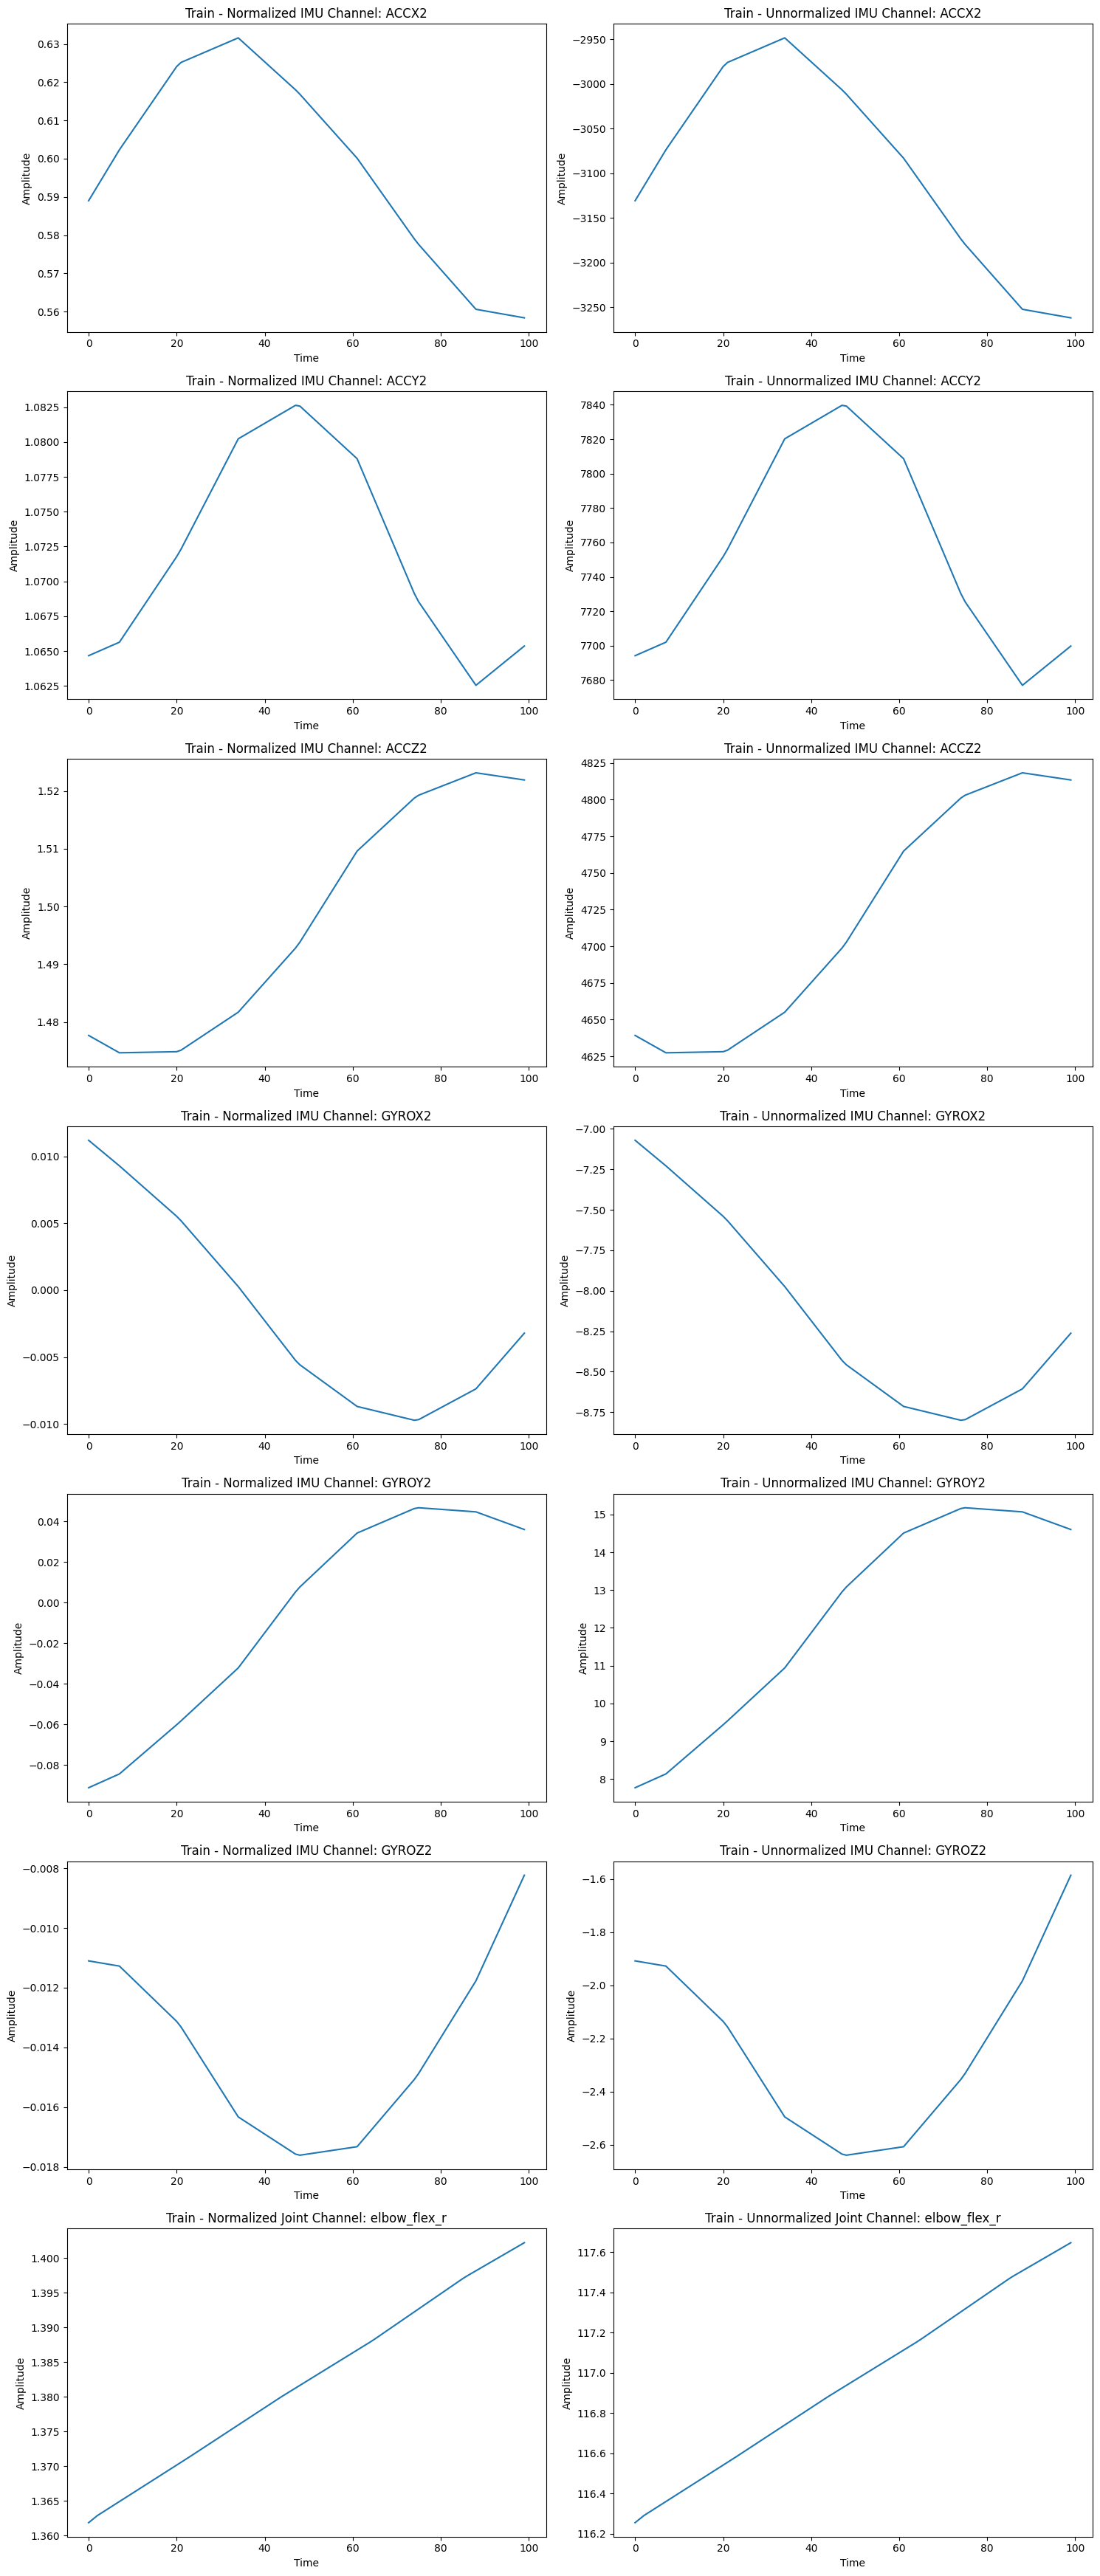

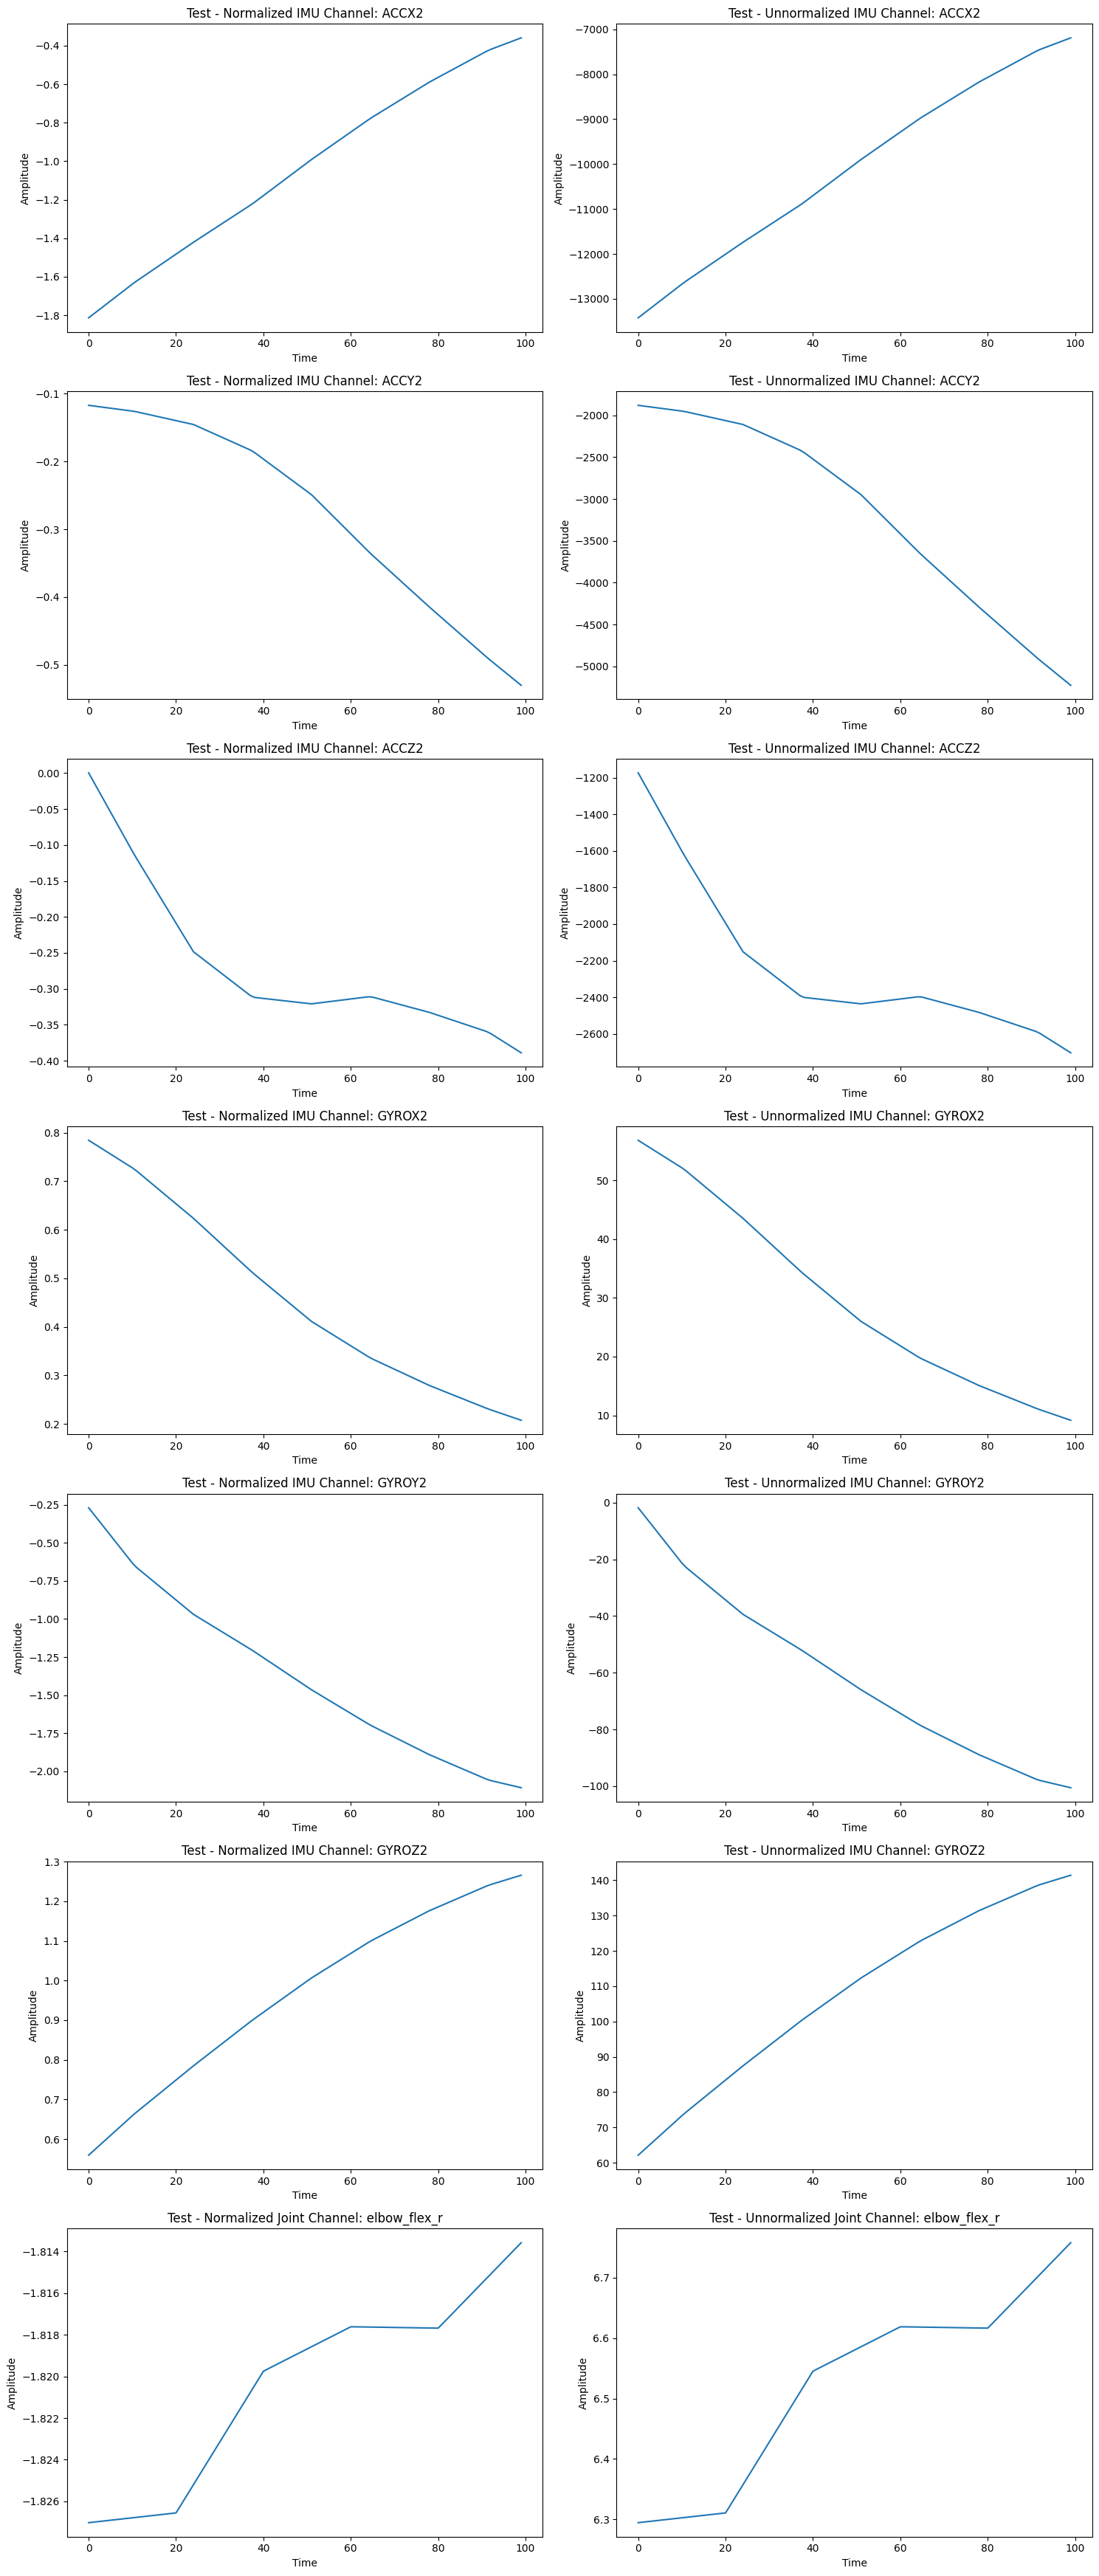

In [9]:
from model_utils import plot_data_kinelight

# Get the first batch from the train loader
x, y = next(iter(train_loader))

# Plot the first element in the train loader
plot_data_kinelight(x, y, config, test_dataset.scaler, "Train")

# Optionally, plot the first element in the test loader
x_test, y_test = next(iter(test_loader))
plot_data_kinelight(x_test, y_test, config, test_dataset.scaler, "Test")

Epoch: 1, time: 8.4392, Training Loss: 0.3981,  Validation loss: 0.3423
Epoch: 2, time: 7.9713, Training Loss: 0.3859,  Validation loss: 0.3364
Epoch: 3, time: 7.9465, Training Loss: 0.3769,  Validation loss: 0.3210
Epoch: 4, time: 7.9129, Training Loss: 0.3719,  Validation loss: 0.3151
Epoch: 5, time: 7.6601, Training Loss: 0.3621,  Validation loss: 0.3122
Epoch: 6, time: 7.9752, Training Loss: 0.3596,  Validation loss: 0.3099
Epoch: 7, time: 7.8055, Training Loss: 0.3564,  Validation loss: 0.3049
Epoch: 8, time: 7.9559, Training Loss: 0.3493,  Validation loss: 0.3030
Epoch: 9, time: 7.7759, Training Loss: 0.3469,  Validation loss: 0.3032
Epoch: 10, time: 7.7220, Training Loss: 0.3425,  Validation loss: 0.2969
Epoch: 11, time: 7.9317, Training Loss: 0.3384,  Validation loss: 0.2975
Epoch: 12, time: 7.7150, Training Loss: 0.3361,  Validation loss: 0.2901
Epoch: 13, time: 7.6950, Training Loss: 0.3322,  Validation loss: 0.2876
Epoch: 14, time: 7.8064, Training Loss: 0.3323,  Validation 

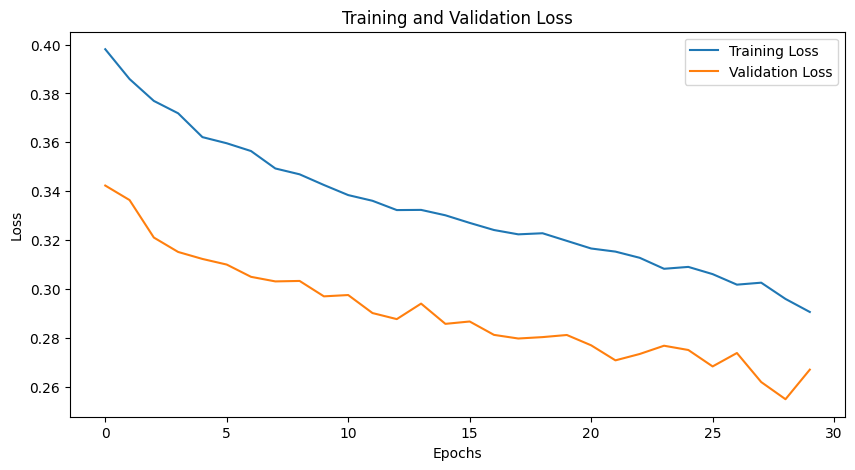

In [12]:
from train import train_kinematics_light
# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Train the model
gait_Net = train_kinematics_light(train_loader, val_loader,config=config, learn_rate=0.001, EPOCHS=30, model=model, filename='gait_net_kinematics_lightweight.pth', device=device)


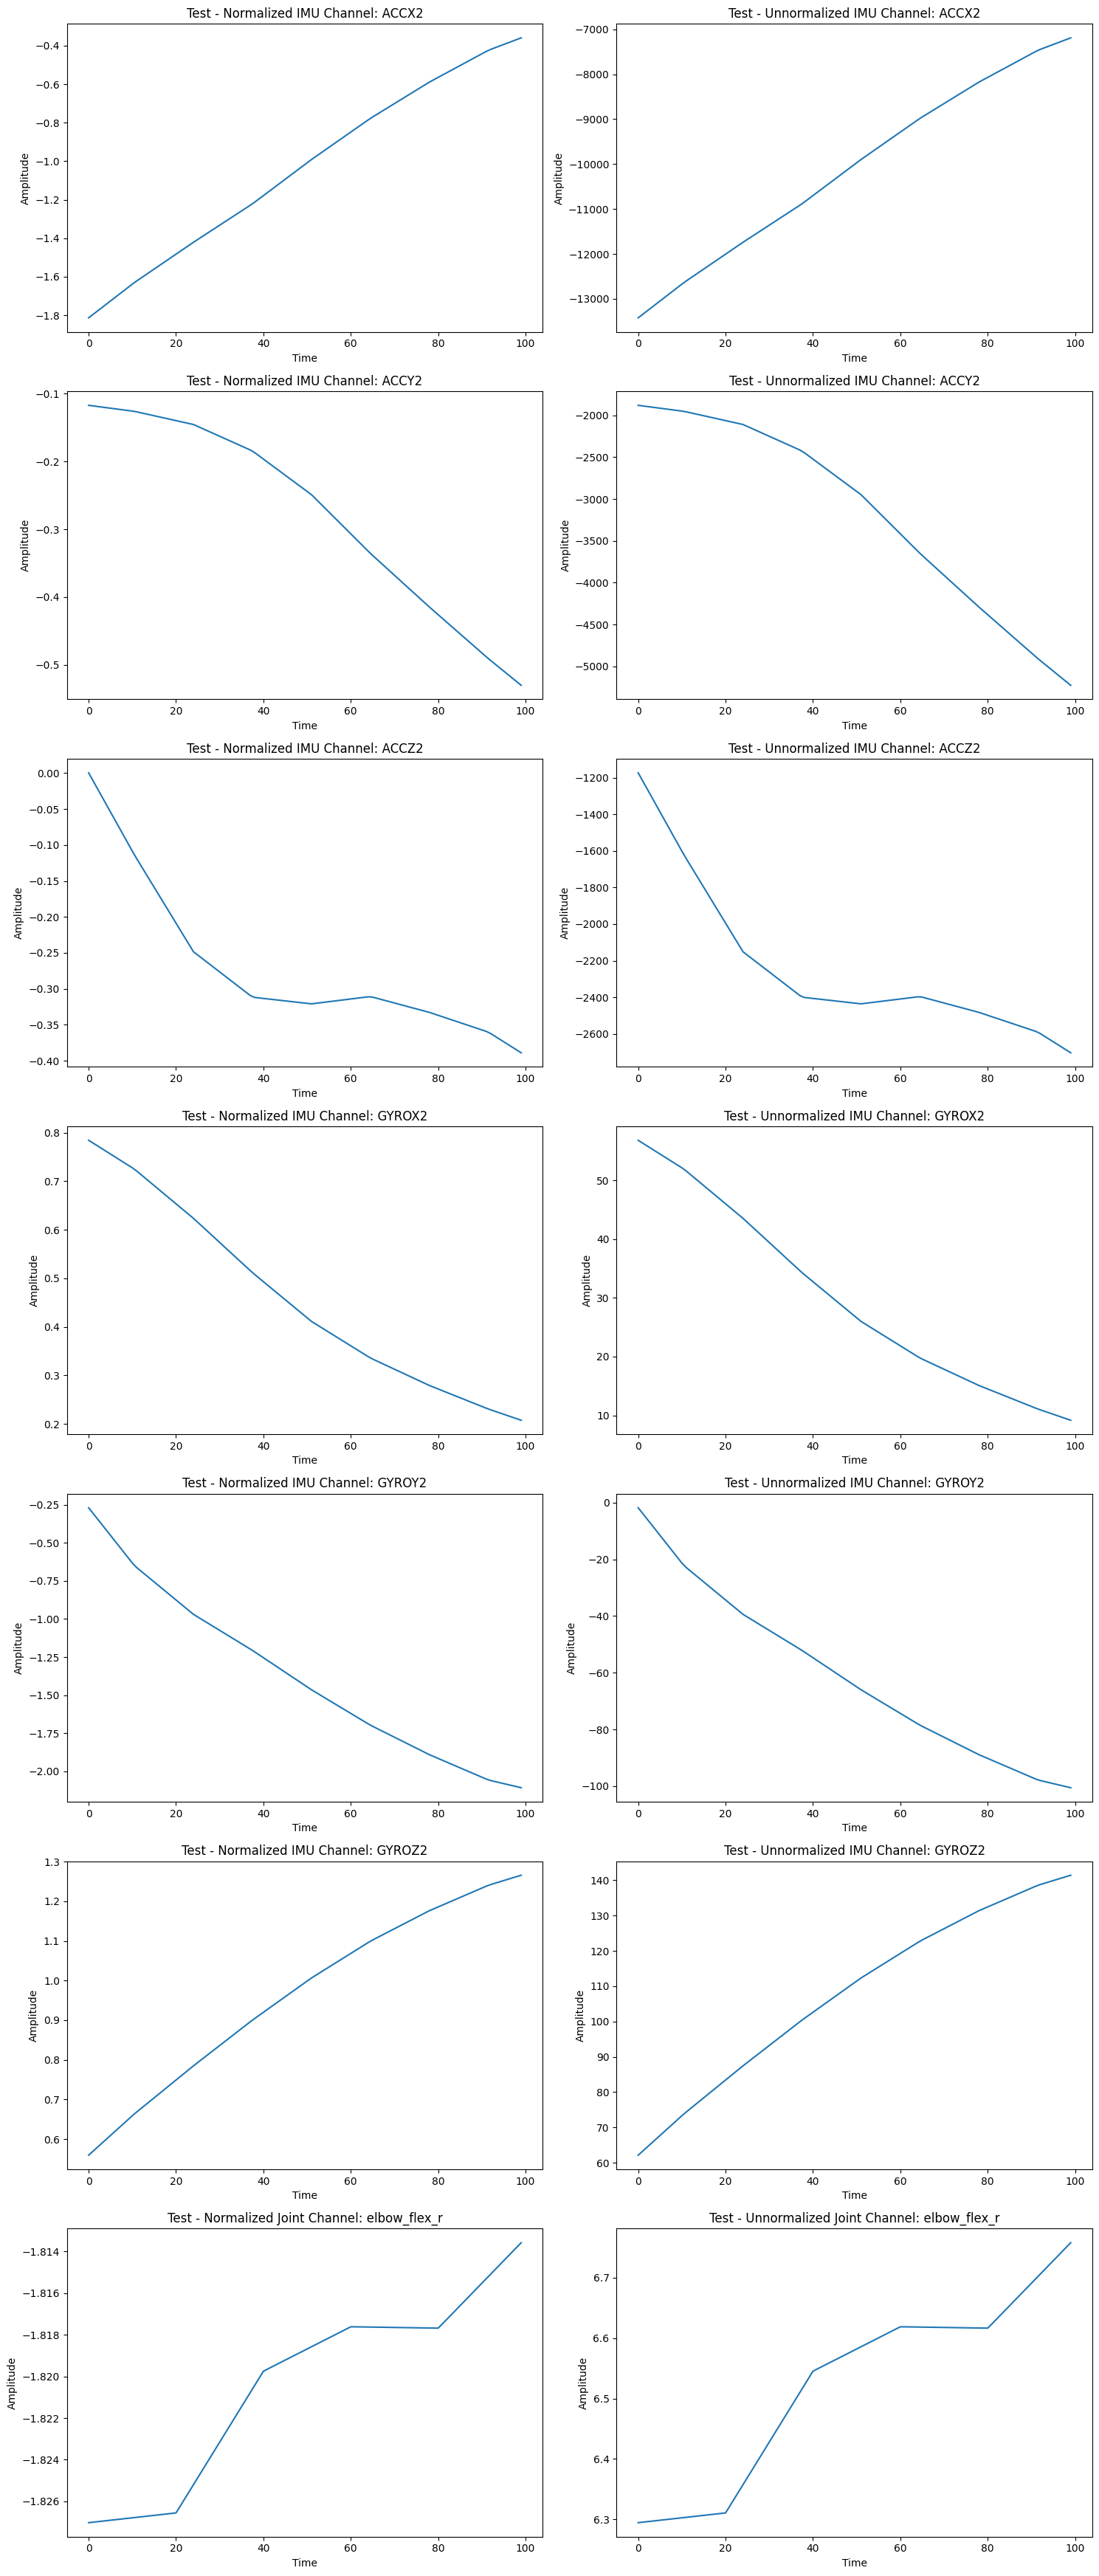

In [37]:
#plot from dataloader
x, y = next(iter(test_loader))
plot_data_kinelight(x, y, config, test_dataset.scaler, "Test")



In [38]:
#test the model on first iteration of test_loader
model.eval()
with torch.no_grad():
    x, y = next(iter(test_loader))
    x = x.to(device)
    y = y.to(device)
    y_pred = model(x[:,:,:len(config.channels_imu) // 2], x[:,:,len(config.channels_imu) // 2:])
    y_pred = y_pred.cpu().numpy()
    y = y.cpu().numpy()
    y_pred = test_dataset.scaler.inverse_transform(y_pred)
    y = test_dataset.scaler.inverse_transform(y)
    plot_data_kinelight(x, y, config, test_dataset.scaler, "Test")
    plot_data_kinelight(x, y_pred, config, test_dataset.scaler, "Prediction")

TypeError: Kinematics_lightweight.forward() missing 1 required positional argument: 'x_gyr'

Test Loss: 1.0942
(19733, 100, 1) (19733, 100, 1)


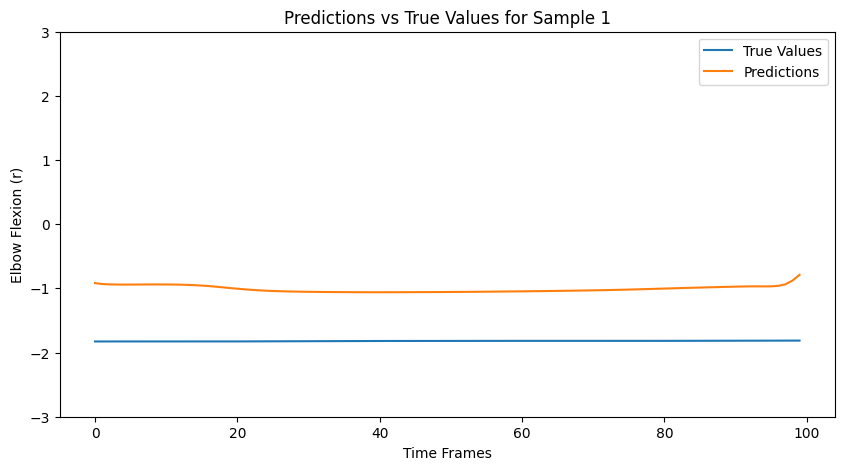

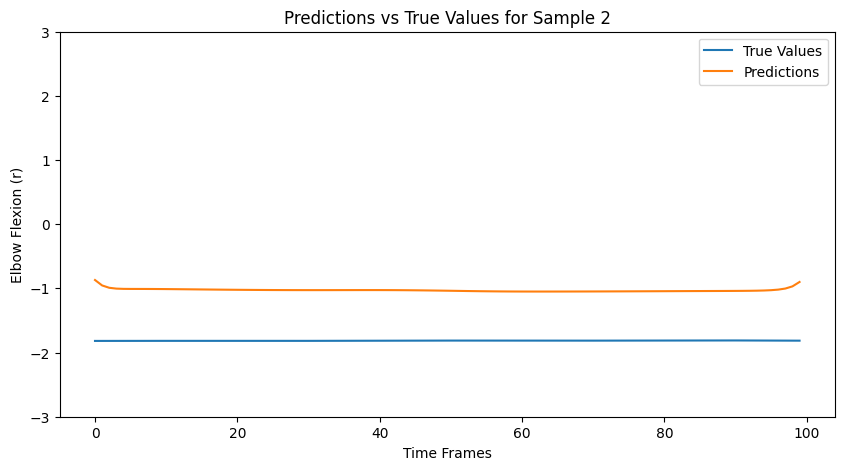

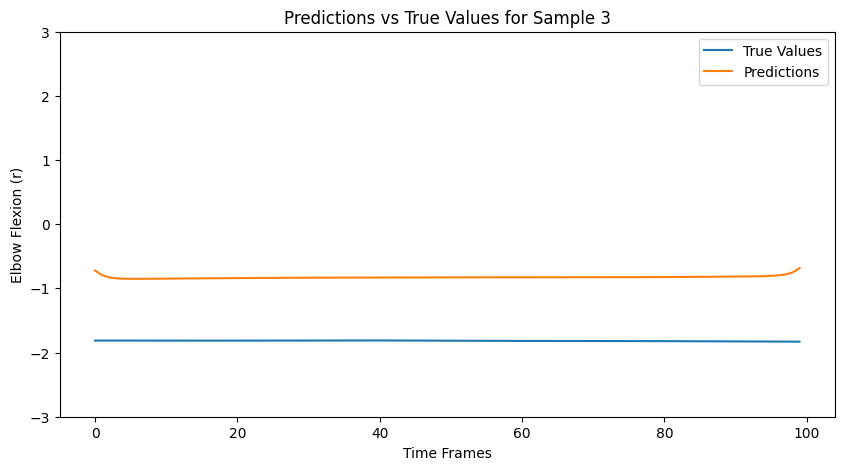

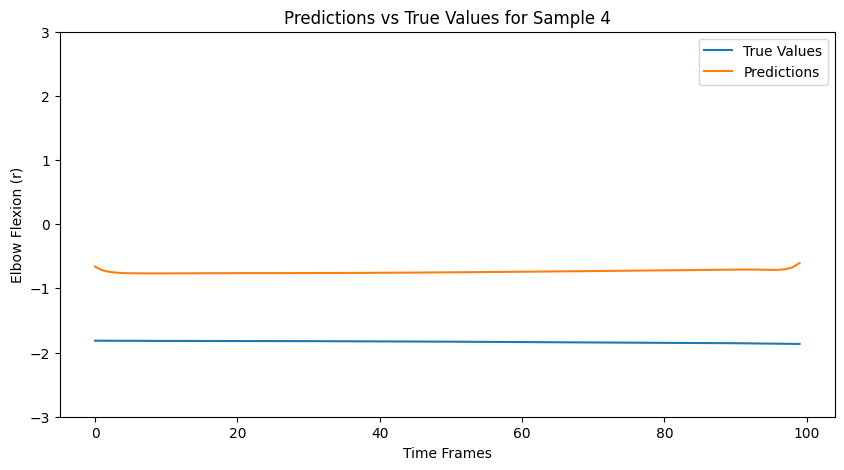

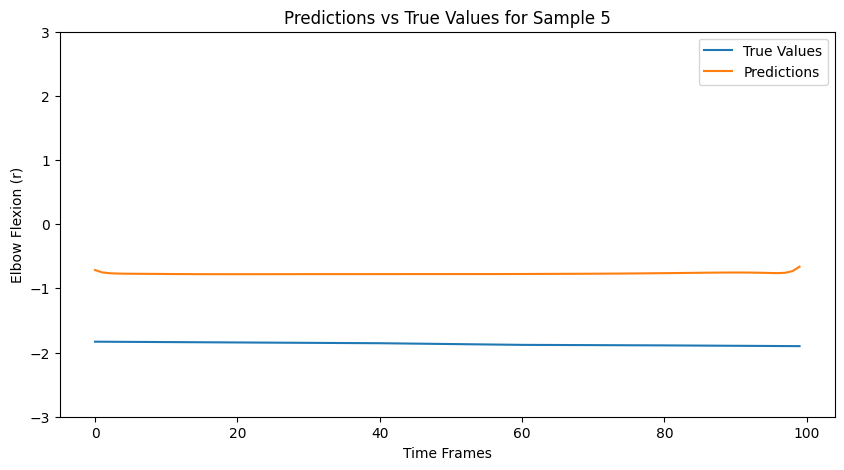

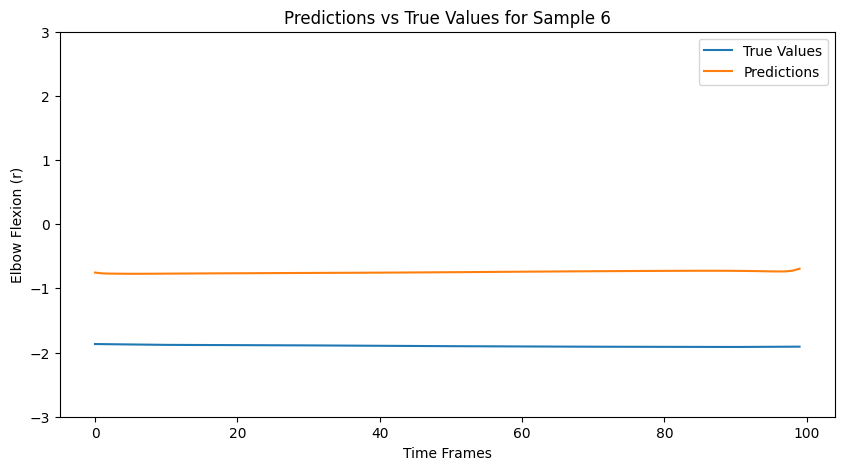

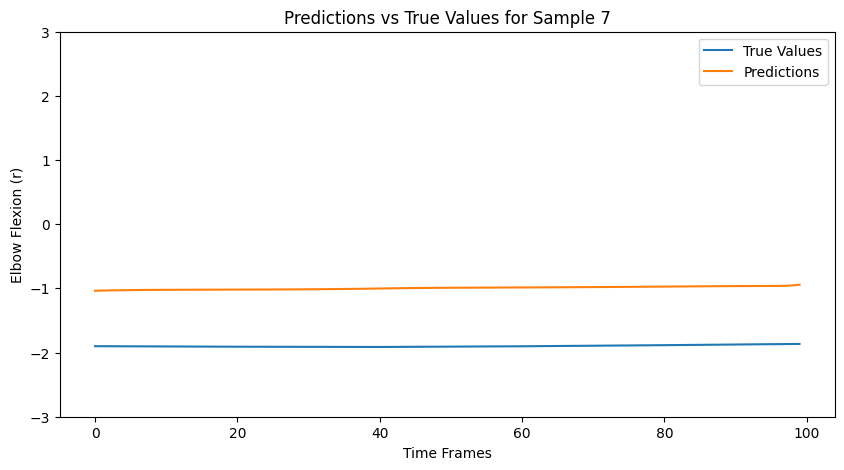

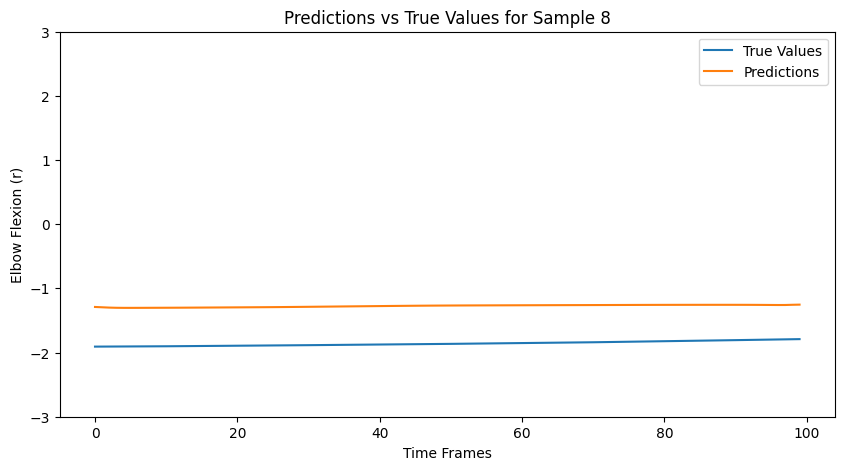

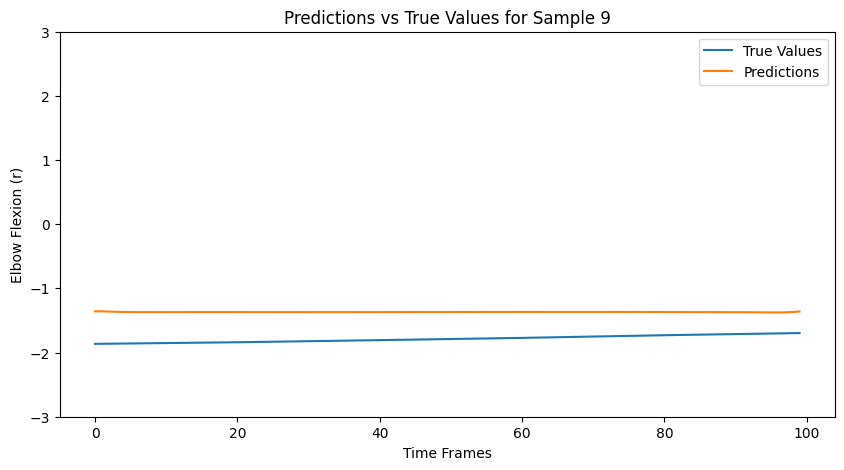

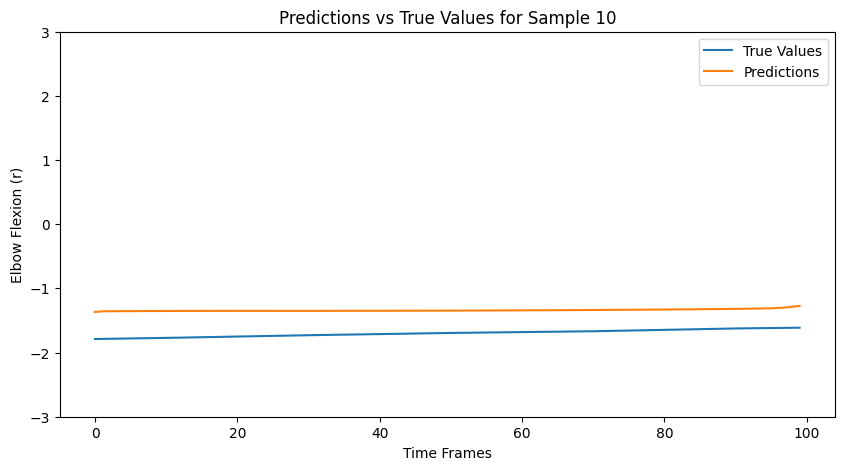

In [16]:
from losses import RMSELoss

model = Kinematics_lightweight(3, 3)
model.load_state_dict(torch.load('gait_net_kinematics_lightweight.pth'))
model.eval()
model.to(device)

# Evaluate the model on the test set
test_loss = 0
all_predictions = []
all_targets = []

criterion = RMSELoss()

with torch.no_grad():
    for data_inputs,data_targets in test_loader:
        output = model(data_inputs[:,:,:len(config.channels_imu) // 2].to(device).float(),data_inputs[:,:,len(config.channels_imu) // 2:].to(device).float())
        loss = criterion(output, data_targets.to(device).float())
        test_loss += loss.item()

        all_predictions.append(output.cpu().numpy())
        all_targets.append(data_targets.cpu().numpy())

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

# Combine all predictions and targets
all_predictions = np.concatenate(all_predictions)
all_targets = np.concatenate(all_targets)

print(all_predictions.shape, all_targets.shape)  # Print shapes for debugging


